In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading data

dataset=load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)if pd.notna(skill_list) else skill_list)



c:\Users\Pratyaksh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da_us= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

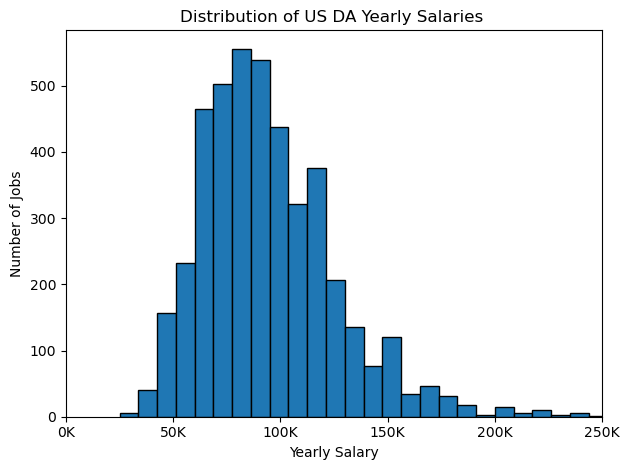

In [12]:
df_da_us['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"{int(x/1000):}K"))
plt.title("Distribution of US DA Yearly Salaries ")
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.tight_layout()